### Imports

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
#from pandas_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import re

## Importing Data

In [2]:
# df = pd.read_csv(r'C:\Users\venka\Desktop\COURSE\CourseWork\Spring2021\ML\Project\vehicles.csv', index_col=0)
df = pd.read_csv(r'D:\All_Docs\Masters\CS 584 Machine Learning\Project\Data\vehicles.csv', index_col=0)

In [3]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458213 entries, 0 to 458212
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   url           458213 non-null  object 
 2   region        458213 non-null  object 
 3   region_url    458213 non-null  object 
 4   price         458213 non-null  int64  
 5   year          457163 non-null  float64
 6   manufacturer  439993 non-null  object 
 7   model         453367 non-null  object 
 8   condition     265273 non-null  object 
 9   cylinders     287073 non-null  object 
 10  fuel          454976 non-null  object 
 11  odometer      402910 non-null  float64
 12  title_status  455636 non-null  object 
 13  transmission  455771 non-null  object 
 14  VIN           270664 non-null  object 
 15  drive         324025 non-null  object 
 16  size          136865 non-null  object 
 17  type          345475 non-null  object 
 18  pain

In [5]:
df = df.drop(columns=['id', 'url', 'region', 'region_url', 'VIN', 'image_url', 'lat', 'long', 'posting_date','size'])

In [6]:
df.describe()

,price,year,odometer
count,4.582130e+05,457163.000000,4.029100e+05
mean,4.042093e+04,2010.746067,1.016698e+05
std,8.194599e+06,8.868136,3.228623e+06
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.900000e+03,2008.000000,4.087700e+04
50%,1.099500e+04,2013.000000,8.764100e+04
75%,2.149500e+04,2016.000000,1.340000e+05
max,3.615215e+09,2021.000000,2.043756e+09


## Data Preprocessing

### Checking for Null values

In [7]:
for i in df.columns:
    if not df[i].isnull().values.any():
        print(i)

price
state


condition
cylinder
fuel
title

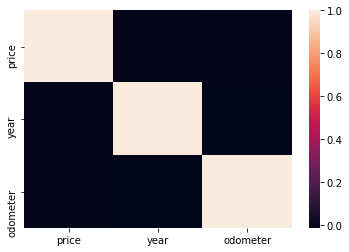

In [8]:
sns.heatmap(df.corr())
plt.show()

In [9]:
df = df.dropna(axis = 0, subset = ['year'])

C:\Users\monic\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year'>

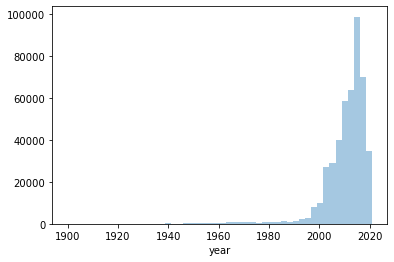

In [10]:
sns.distplot(df.year, kde = False)

C:\Users\monic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

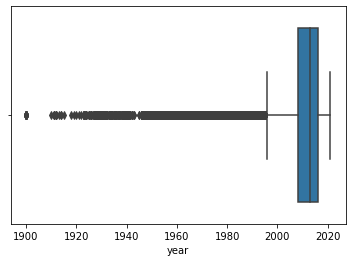

In [11]:
sns.boxplot(df.year)

In [12]:
df = df[(df.year > 1995)]

C:\Users\monic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

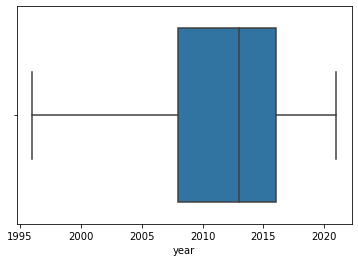

In [13]:
sns.boxplot(df.year)

In [14]:
df['manufacturer'].isna().sum()

14655

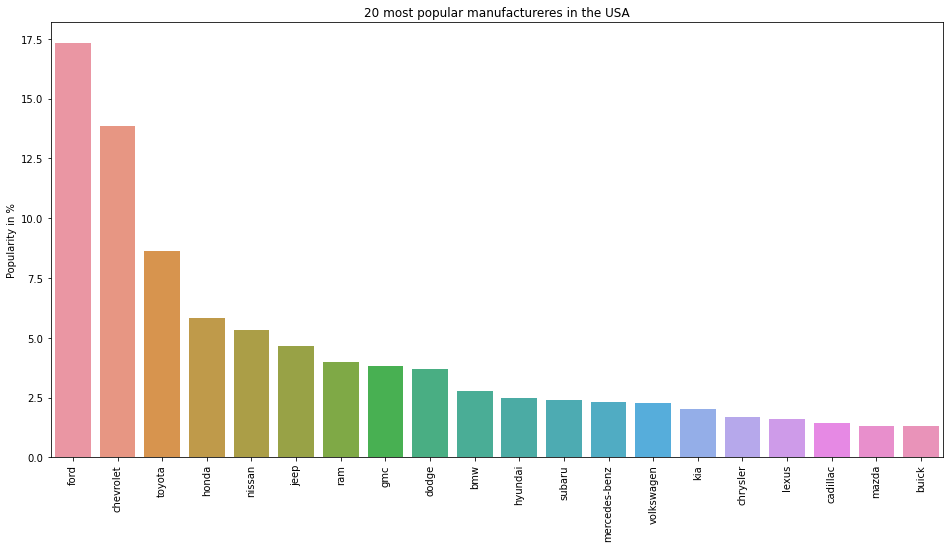

In [15]:
manufacturers = df["manufacturer"].value_counts().div(len(df)).mul(100)
manufactuters_TOP20 = manufacturers[:20]

plt.figure(figsize=(16,8))
sns.barplot(x=manufactuters_TOP20.index, y=manufactuters_TOP20.values)
plt.title("20 most popular manufactureres in the USA")
plt.ylabel("Popularity in %")
plt.xticks(rotation=90)
plt.show()

In [16]:
df['manufacturer'] = df['manufacturer'].fillna("unknown")

In [17]:
df['model'].isna().sum()

3752

In [18]:
df[df['model'] == '$$ CASH 4 JUNK CARS']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state
349439,1500,2000.0,unknown,$$ CASH 4 JUNK CARS,salvage,other,gas,NaN,salvage,other,fwd,NaN,NaN,I pay cash for junk cars and unwanted vehicles...,sc
350064,1000,2000.0,unknown,$$ CASH 4 JUNK CARS,salvage,other,gas,NaN,salvage,other,fwd,NaN,NaN,I pay cash for junk cars and unwanted vehicles...,sc
350159,1000,2000.0,unknown,$$ CASH 4 JUNK CARS,salvage,other,gas,NaN,salvage,other,fwd,NaN,NaN,I pay cash for junk cars and unwanted vehicles...,sc


In [19]:
df['model'] = df['model'].replace(['$$ CASH 4 JUNK CARS'],'Junk Cars')

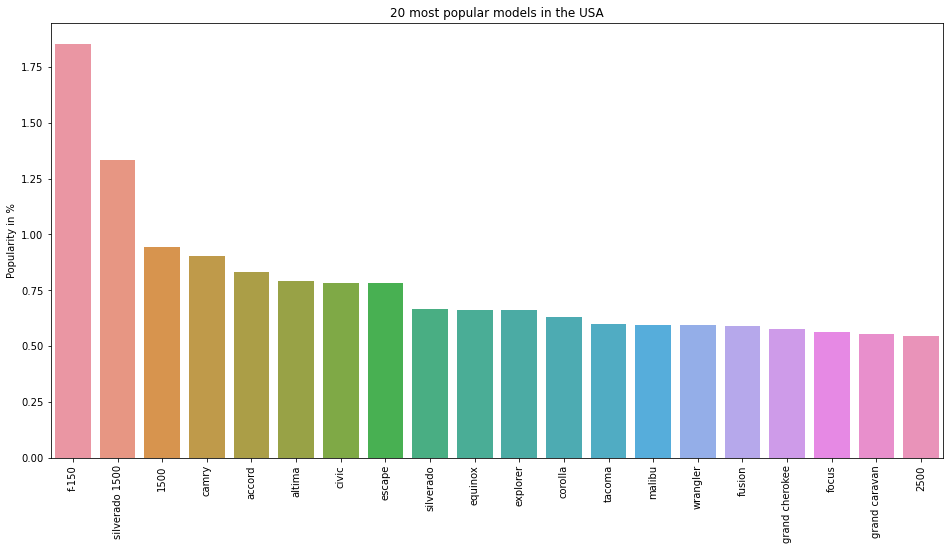

In [20]:
models = df["model"].value_counts().div(len(df)).mul(100)
models_TOP20 = models[:20]

plt.figure(figsize=(16,8))
sns.barplot(x=models_TOP20.index, y=models_TOP20.values)
plt.title("20 most popular models in the USA")
plt.ylabel("Popularity in %")
plt.xticks(rotation=90)
plt.show()

In [21]:
df['model'] = df['model'].fillna('unknown')

C:\Users\monic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


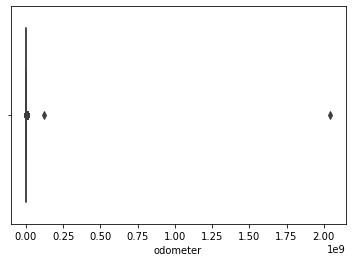

In [22]:
sns.boxplot(df['odometer'])
plt.show()

In [23]:
df = df[(df.odometer < 250000) & (df.odometer > 10)]

C:\Users\monic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='odometer'>

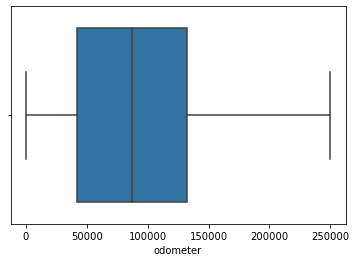

In [24]:
sns.boxplot(df['odometer'])

In [25]:
df.odometer.isna().sum()

0

In [26]:
df.condition.value_counts()

good         103039
excellent     99415
like new      20869
fair           4587
new             779
salvage         386
Name: condition, dtype: int64

<AxesSubplot:xlabel='condition', ylabel='count'>

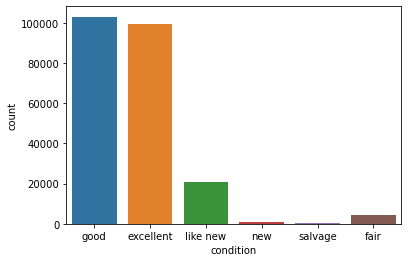

In [27]:
sns.countplot(x=df['condition'])

In [28]:
df['condition'] = df['condition'].replace(['new'],'like new')

In [29]:
df.condition.isna().sum()

152506

In [30]:
odo_mean_excellent=df[df['condition'] == 'excellent']['odometer'].mean()
odo_mean_good=df[df['condition'] == 'good']['odometer'].mean()
odo_mean_salvage=df[df['condition'] == 'salvage']['odometer'].mean()
odo_mean_fair=df[df['condition'] == 'fair']['odometer'].mean()
odo_mean_like_new=df[df['condition'] == 'like new']['odometer'].mean()

In [31]:
df.groupby(by = 'condition').mean()['odometer']

condition
excellent    101133.489916
fair         162416.796163
good          83761.420773
like new      73685.491778
salvage      136071.217617
Name: odometer, dtype: float64

In [32]:
df.loc[df['odometer'] <= odo_mean_like_new, 'condition'] = df.loc[df['odometer'] <= odo_mean_like_new, 'condition'].fillna('like new')

In [33]:
df.loc[df['odometer'] >= odo_mean_fair, 'condition'] = df.loc[df['odometer'] >= odo_mean_fair, 'condition'].fillna('fair')

In [34]:
df.loc[((df['odometer'] > odo_mean_like_new) & 
       (df['odometer'] <= odo_mean_good)), 'condition'] = df.loc[((df['odometer'] > odo_mean_like_new) & 
       (df['odometer'] <= odo_mean_good)), 'condition'].fillna('good')

In [35]:
df.loc[((df['odometer'] > odo_mean_good) & 
       (df['odometer'] <= odo_mean_excellent)), 'condition'] = df.loc[((df['odometer'] > odo_mean_good) & 
       (df['odometer'] <= odo_mean_excellent)), 'condition'].fillna('excellent')

In [36]:
df.loc[((df['odometer'] > odo_mean_excellent) & 
       (df['odometer'] <= odo_mean_salvage)), 'condition'] = df.loc[((df['odometer'] > odo_mean_excellent) & 
       (df['odometer'] <= odo_mean_salvage)), 'condition'].fillna('salvage')

In [37]:
df.loc[((df['odometer'] > odo_mean_salvage) & 
       (df['odometer'] <= odo_mean_fair)), 'condition'] = df.loc[((df['odometer'] > odo_mean_salvage) & 
       (df['odometer'] <= odo_mean_fair)), 'condition'].fillna('fair')

In [38]:
df.condition.isna().sum()

0

In [39]:
df.cylinders.isna().sum()

128249

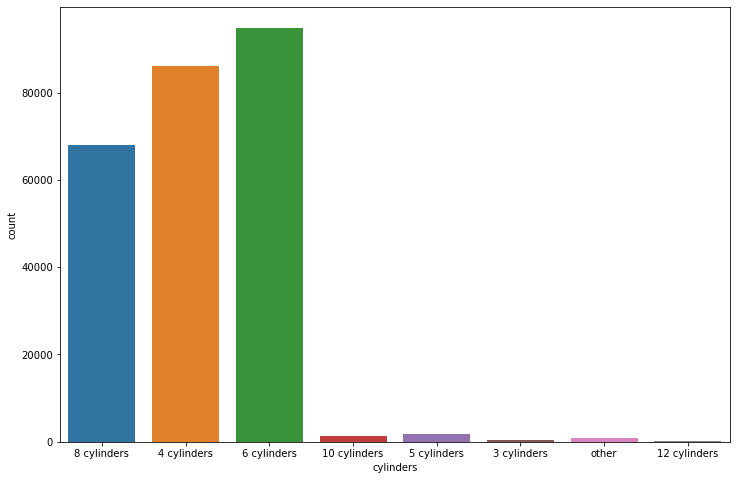

In [40]:
plt.figure(figsize = (12,8))
sns.countplot(x = df['cylinders'])
plt.show()

In [41]:
df['cylinders'].value_counts()

6 cylinders     94858
4 cylinders     85966
8 cylinders     68036
5 cylinders      1778
10 cylinders     1377
other             756
3 cylinders       426
12 cylinders      135
Name: cylinders, dtype: int64

In [42]:
df['cylinders'] = df['cylinders'].replace(['other'],'unknown')
df['cylinders']=df['cylinders'].fillna('unknown')

In [43]:
df['cylinders'].isna().sum()

0

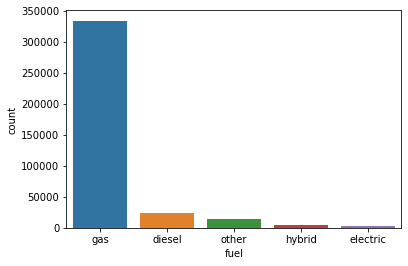

In [44]:
sns.countplot(x = df['fuel'])
plt.show()

In [45]:
df.fuel.isna().sum()

2172

In [46]:
df['fuel']=df['fuel'].fillna(df['fuel'].mode()[0])

In [47]:
df.fuel.isna().sum()

0

In [48]:
df['title_status'].isna().sum()

1582

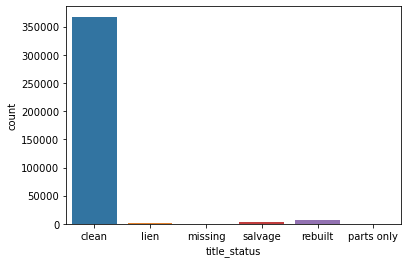

In [49]:
sns.countplot(x = df['title_status'])
plt.show()

In [50]:
df['title_status']=df['title_status'].fillna(df['title_status'].mode()[0])

In [51]:
df.title_status.isna().sum()

0

My Code Starts

In [52]:
print(df['transmission'].shape)

(381581,)


In [53]:
df['transmission'].value_counts()

automatic    332915
other         29778
manual        17275
Name: transmission, dtype: int64

In [54]:
for index, row in df.iterrows():
    if row["transmission"]!=row["transmission"]:
        regex=r"[A|a]utomatic|[M|m]anual"
        if row["description"]!=row["description"]:
            pass
        else:
            trans=re.findall(regex,row["description"])
            if len(trans)!=0:
                df.at[index,"transmission"]=trans[0].lower()

In [55]:
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])

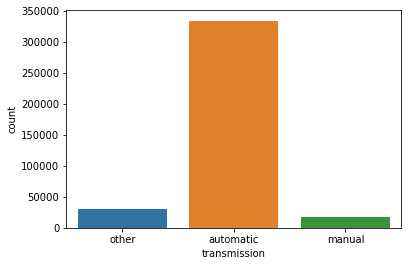

In [56]:
sns.countplot(x =df['transmission'])
plt.show()

In [57]:
df['drive'].shape

(381581,)

In [58]:
df['drive'].value_counts()

4wd    125878
fwd    112488
rwd     50530
Name: drive, dtype: int64

In [59]:
df['drive'].value_counts().sum()

288896

In [60]:
for index, row in df.iterrows():
    regexDrive=r"[0-4]WD|[0-4]wd|fwd|FWD|rwd|RWD"
    if row["drive"]!=row["drive"]:
        if row["description"]!=row["description"]:
            pass
        else:
            drive=re.findall(regexDrive,row["description"])
            if len(drive)!=0:
                df.at[index,"drive"]=drive[0].lower()   

In [61]:
for index, row in df.iterrows():
    if(row["drive"]=="fwd"):
        df.at[index,"drive"]="2"
    if(row["drive"]=="rwd"):
        df.at[index,"drive"]="2"
    if(row["drive"]=="4wd"):
        df.at[index,"drive"]="4"
    if(row["drive"]=="2wd"):
        df.at[index,"drive"]="2"

In [62]:
df = df[df['drive'] != '1wd']
df= df[df['drive'] != '0wd']
df= df[df['drive'] != '3wd']

In [63]:
df['drive']=df['drive'].fillna(df['drive'].mode()[0])

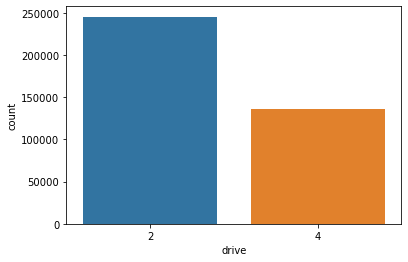

In [64]:
sns.countplot(x =df['drive'])
plt.show()

In [65]:
df['type'].value_counts()

sedan          85129
SUV            73463
pickup         39218
truck          30653
other          21830
coupe          16114
hatchback      15457
wagon           9788
van             8614
mini-van        5626
convertible     5326
bus              564
offroad          377
Name: type, dtype: int64

In [66]:
df['type'].value_counts().sum()

312159

In [67]:
i

'state'

In [68]:
for index, row in df.iterrows():
    if row["type"]!=row["type"]:
        regexp_type=r"[S|s]edan|[P|p]ickup|[T|t]ruck|[C|c]oupe|[H|h]atchback|[W|w]agon|[V|v]an|[C|c]onvertible|[M|m]ini-van|[O|o]ffroad|[B|b]us"
        if row["description"]!=row["description"]:
            pass
        else:
            carType=re.findall(regexp_type,row["description"])
            if len(carType)!=0:
                df.at[index,"type"]=carType[0].lower()  

In [69]:
df['type'] = df['type'].fillna(df['type'].mode()[0])

In [70]:
df = df.drop(columns=["description"])

In [71]:
midwest=["il","in","mi","oh","wi","ia","ks","mn","mo","ne","nd","sd"]
northeast=["ct","me","ma","nh","ri","vt","nj","ny","pa"]
west=["az","co","id","mt","nv","nm","ut","wy","wa","or","hi","ca","az","ak"]
south=["de","fl","ga","md","nc","sc","va","wv","dc","ms","al","ky","tn","ar","tx","ok","la"]

In [72]:
for index, row in df.iterrows():
    if(row["state"] in south):
        df.at[index,"state"]="south"
    if(row["state"] in midwest):
        df.at[index,"state"]="midwest"
    if(row["state"] in west):
        df.at[index,"state"]="west"
    if(row["state"] in northeast):
        df.at[index,"state"]="northeast"

In [73]:
df.shape

(381570, 14)

In [74]:
df.drop(["model","paint_color"],axis=1,inplace=True)

df.drop(df[df["title_status"]=="parts only"].index,inplace=True)
df.drop(df[df["title_status"]=="missing"].index,inplace=True)
df.drop(df[df["title_status"]=="lien"].index,inplace=True)

df.drop(df[df["price"]<2000].index,inplace=True)
df.drop(df[df["price"]>40000].index,inplace=True)

In [76]:
yearmed=df["year"].median()
df["year"].fillna(yearmed)
for index, row in df.iterrows():
    if(row["year"]>2020):
        df.at[index,"year"]=yearmed

In [77]:
df.to_csv('cleaned2.csv')